# 自然语言处理

**目录**

***1 简介***

****1.1 定义****

****1.2 语言模型****

****1.3 神经网络****
  
***2 文本分类***

****2.1 定义****

****2.2 数据集****
  
***3 BERT***

****3.1 简介****

****3.2 实例****

## 1 简介

### 1.1 定义
自然语言处理（Natural language processing, NLP）是人工智能的子领域，期望让计算机能理解人类语言并给出适当的反馈。NLP的应用包括语音识别，问答系统，语言翻译和文本分类等。

其中一种让机器理解语言的方式是机器学习。由于文本是一种有序的任意长字符，对其建模的过程又可称为序列建模（Sequence modeling）。模型的输入数据X是一个任意长单词(word), 即$X=\{w_1, w_2,...,w_n\}$。假设有个任务$T$, 给定输入数据$X$, $T$的目标是预测$X$的潜在未知输出$y$, 其中$y$可以是数值, 类别, 或一个任意长序列。机器学习的目标是根据过去已有的数据 $ <X_{train}, y_{train}> $，训练一个带参数$W$的数学模型$f(x)$去预测 $\hat y$, 最终使得对任意未知的$X_{unknow}$ 都能有 $ y \approx \hat y$, 即:

$$ y \approx \hat y = f( \textbf{X} ; \textbf{W} ) $$

### 1.2 语言模型
语言模型用于预测一段文本$X=\{w_1, w_2,...,w_n\}$出现在某个特定语言的概率。首先，根据马尔可夫链(Markov Chain), 需要假设文本的因式分解顺序(Factorization Orders)来确定条件概率。这里引入人类先验知识(Prior)，假设目标语言是从左到右的顺序阅读。那么$X$的联合概率可定义为：
\begin{equation}
\begin{split}
\begin{aligned}
P(X) = P(w_1, w_2,...,w_n) &= P(w_1)P(w_2|w_1)...P(w_n|w_1,...,w_n) \\
 &= \prod_{t=1}^N{P(w_t|\bf{w_{i<t}})}
\end{aligned}
\end{split}
\end{equation}

### 1.3 神经网络
其中一种机器学习方法是神经网络(Neural Networks)，它通过非线性复合函数来拟合目标函数。如果把自然语言看成是符合某种概率分布的随机变量，那么可以通过神经网络来拟合自然语言的概率分布函数。如下图：
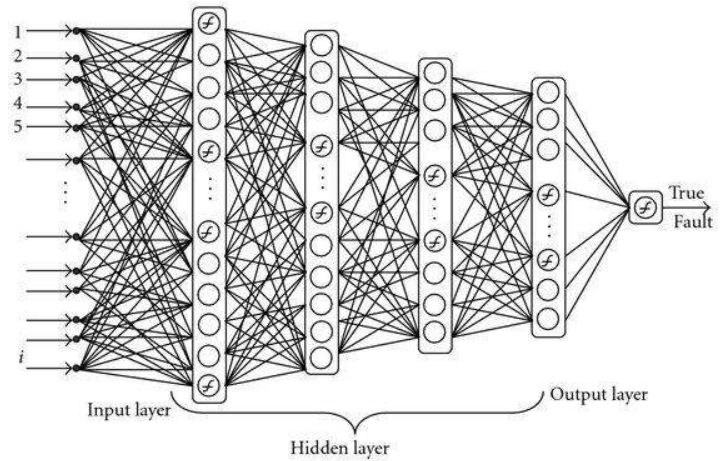


目前神经网络主要有几种类型: <br>
1) 传统的神经网络如上图所示，称为前馈神经网络(Feed-Forward Neural Networks, FFNNs)<br>
2) 卷积神经网络(Convolutional Neural Networks, CNNs), 主要用于图像处理和少数NLP任务:
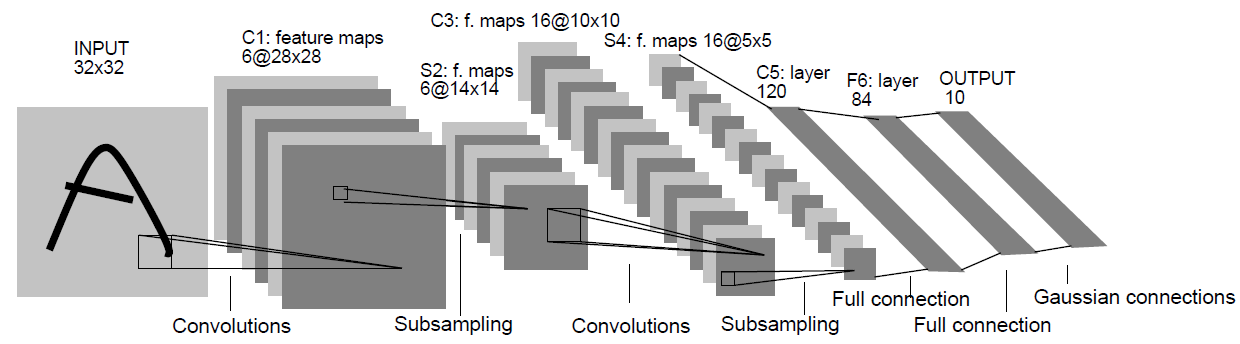

3) 循环神经网络(Recurrent Neural Networks, RNNs), 主要用于序列建模，如NLP，视频分析等:
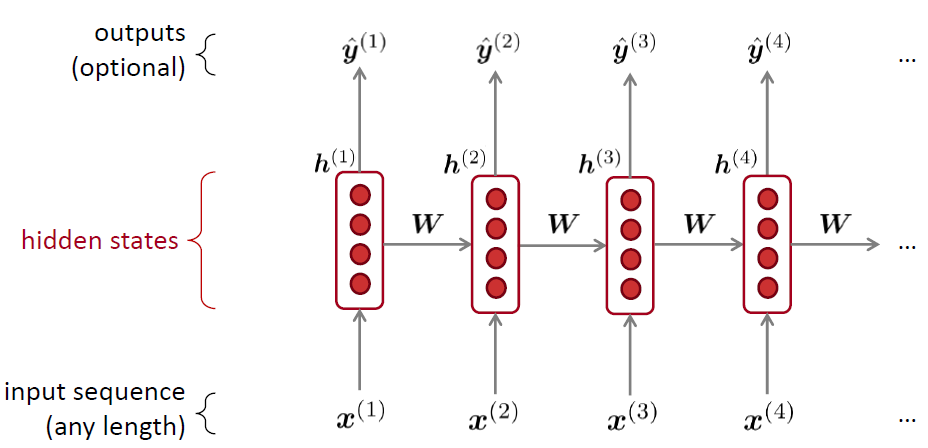

目前NLP主流是用RNNs和FFNNs的一个组合，叫注意力机制(Attention)，使得模型可以从输入数据中选择更重要的信息来处理。它计算一段文本所有信息的加权和，权重由注意力分布来决定。具体来说，注意力机制中有3种信息，查询变量Q和键值对K-V，首先把Q和K输入一个打分函数得到注意力得分，然后根据得分计算注意力分布$\alpha$，也就是权重。最后用$\alpha$对V进行加权求和:
$$Attention(Q,K,V)=\alpha(Q,K)V=softmax(score(Q,K))\cdot V=\sum_{i=1}^N{\alpha_i V_i}$$
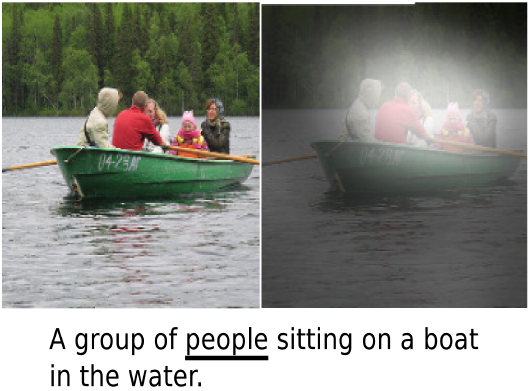

## 2 文本分类

### 2.1 定义
给定一段n个字符的文本$X=\{w_1, w_2,...,w_n\}$, 模型$z=f(X)$预测对应的分类$c_i$。一个多分类预测的函数是$softmax$, 输入$x$属于某个分类$c_i$的概率可以表示为:
$$P(c_i|\textbf{x}) = softmax(\textbf{z})_i = \frac{exp(z_i)}{\sum_{j=1}^{c}{exp(x_j)}} $$

### 2.2 数据集
使用有监督学习需要标注好的训练数据。对于文本分类任务，训练数据包括2个元素：文本和对应的分类。比如商品名分类中，一条数据可以是('西瓜 整个 5斤重', '水果')。
训练数据可以通过对无标注数据进行人工标注获得。质量好的训练数据应遵循3个原则：数据量多，类别平衡（每个分类的数据相近），噪音少（标注的数据正确）。
对于标注好的数据，一般会进一步划分为训练数据和验证数据，模型训练时只用到训练数据，而验证数据用来检验模型的泛化能力，即对于未知数据的预测能力。

## 3 BERT
### 3.1 简介
BERT是Bidirectional Encoder Reresentations from Transformer的缩写，是由谷歌提出的NLP模型。其训练包括预训练(pre-training)和微调(fine-tuning)2部分。其中预训练在大规模文本上进行自编码器训练，训练时间和资源消耗较大；微调在目标任务上进行任务相关的有监督训练，训练相对短暂。BERT的模型结构如下：
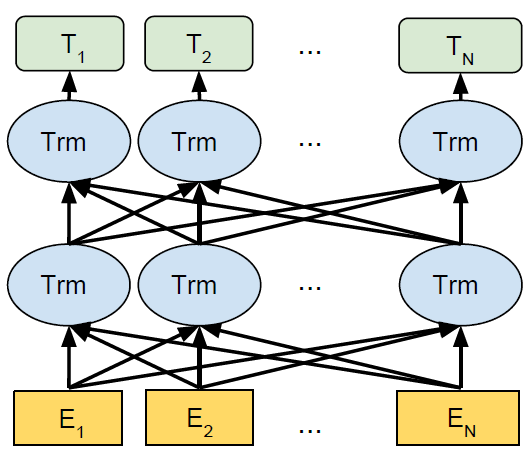

在实际应用中，一般只需要BERT在具体任务上进行微调。比如在商品标题分类中，先加载BERT的中文预训练模型权重，再用文本分类的训练方法在标注数据进行权重微调。

### 3.2 实例

实际应用中需要用到某个深度学习库，如Python中有TensorFlow和Pytorch。硬件要求有Nvidia的GPU。下面以TensorFlow的Bert实现来进行演示。

In [ ]:
from xsyx_nlp import Bert_Classifier

# 数据准备...比如定义train_X, train_y,或者放到某个目录中以csv文件格式存储

init_checkpoint = "drive/My Drive/chinese-bert_chinese_wwm_L-12_H-768_A-12/bert_model.ckpt"
vocab_file="drive/My Drive/chinese-bert_chinese_wwm_L-12_H-768_A-12/vocab.txt"
data_dir="drive/My Drive/Colab Notebooks/"
bert_config_file="drive/My Drive/chinese-bert_chinese_wwm_L-12_H-768_A-12/bert_config.json"
output_dir="output"

model = Bert_Classifier(init_checkpoint, vocab_file, bert_config_file, data_dir, output_dir='output',max_seq_length=64)

model.train(train_X, train_y)
model.evaluate(valid_X, valid_y)
model.predict(test_X)